# Investiagtion on interpolation steps

Goal: See wich type of interpolation distance helps best for finding optimal parameters with with relatively deep depth

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir("../")

In [2]:
df = pd.read_feather("results/int_qpfp_lin.feather")
df.penalty = df.penalty.fillna("auto")
df.penalty = df.penalty.replace(-2, "max")
df["qaoa"] += "_" + df.cost

In [3]:
df

,depth,energy,approx_ratio,feas_ratio,feas_approx_ratio,p_opt,p_999,p_99,p_9,rnd_approx_ratio,...,n_qubits,problem_id,cost,qaoa,interpolate,initial,beta_scale,gamma_scale,penalty,set_penalty
0,1,-19.813856,0.232784,0.357571,0.651014,0.059695,0.059695,0.059695,0.119798,0.166118,...,6,0,default,masked_cost_default,False,linear,0.2,0.2,auto,NaN
1,2,-35.141082,0.412212,0.553211,0.745126,0.138054,0.138054,0.138054,0.273954,0.362189,...,6,0,default,masked_cost_default,False,linear,0.2,0.2,auto,NaN
2,4,-66.267873,0.779405,0.886719,0.878977,0.341766,0.341766,0.341766,0.662595,0.760373,...,6,0,default,masked_cost_default,False,linear,0.2,0.2,auto,NaN
3,8,-82.536905,0.971027,0.998625,0.972365,0.497863,0.497863,0.497863,0.943302,0.968491,...,6,0,default,masked_cost_default,False,linear,0.2,0.2,auto,NaN
4,16,-84.133187,0.989812,0.999960,0.989852,0.570384,0.570384,0.570384,0.999853,0.988911,...,6,0,default,masked_cost_default,False,linear,0.2,0.2,auto,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,1,-25.671364,0.291707,0.657993,0.443329,0.003105,0.003105,0.003105,0.003105,0.237461,...,8,63,masked_cost,quad_penalty_full_problem_masked_cost,False,linear,0.2,0.2,auto,5.5
3196,2,-30.726679,0.349186,0.689199,0.506656,0.001810,0.001810,0.001810,0.001810,0.299308,...,8,63,masked_cost,quad_penalty_full_problem_masked_cost,False,linear,0.2,0.2,auto,5.5
3197,4,-35.410211,0.402390,0.863067,0.466233,0.011941,0.011941,0.011941,0.011941,0.356608,...,8,63,masked_cost,quad_penalty_full_problem_masked_cost,False,linear,0.2,0.2,auto,5.5
3198,8,-38.389595,0.436247,0.918480,0.474966,0.012507,0.012507,0.012507,0.012507,0.393058,...,8,63,masked_cost,quad_penalty_full_problem_masked_cost,False,linear,0.2,0.2,auto,5.5


(0.0, 1.0461082966586854)

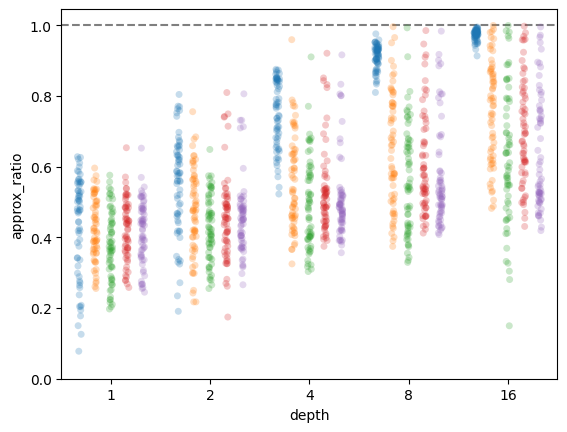

In [4]:
plt.axhline(y=1, color="k", linestyle="--", alpha=0.5)
order = ["masked_cost_default", "quad_penalty_cost_masked_cost", "quad_penalty_cost_default", "quad_penalty_full_problem_masked_cost", "quad_penalty_full_problem_default"]
sns.stripplot(df.query("n_qubits == 8"), x="depth", y="approx_ratio", hue="qaoa", alpha=0.25, dodge=True, legend=False, jitter=0.1, hue_order=order)
# plt.yscale("log")
plt.ylim([0, None])

In [5]:
dfquad = df[df.qaoa.transform(lambda x: x.startswith("quad"))]

In [6]:
dfquad.query("depth == 16 and n_qubits == 8 and approx_ratio > 0.95")

,depth,energy,approx_ratio,feas_ratio,feas_approx_ratio,p_opt,p_999,p_99,p_9,rnd_approx_ratio,...,n_qubits,problem_id,cost,qaoa,interpolate,initial,beta_scale,gamma_scale,penalty,set_penalty
1709,16,-70.190873,0.963533,0.964378,0.999123,0.954272,0.954272,0.954272,0.962935,0.943923,...,8,4,default,quad_penalty_cost_default,False,linear,0.2,0.2,auto,0.008264
1714,16,-70.508134,0.965974,0.987002,0.978695,0.559145,0.559145,0.559145,0.970913,0.950256,...,8,4,masked_cost,quad_penalty_cost_masked_cost,False,linear,0.2,0.2,auto,0.008264
1719,16,-69.447425,0.951273,0.959472,0.991455,0.796931,0.796931,0.796931,0.946740,0.929081,...,8,4,default,quad_penalty_full_problem_default,False,linear,0.2,0.2,auto,0.008264
1724,16,-69.962735,0.958405,0.968680,0.989393,0.839210,0.839210,0.839210,0.944420,0.939368,...,8,4,masked_cost,quad_penalty_full_problem_masked_cost,False,linear,0.2,0.2,auto,0.008264
1909,16,-113.258009,0.984834,0.987192,0.997611,0.968183,0.968183,0.968183,0.978644,0.975629,...,8,12,default,quad_penalty_cost_default,False,linear,0.2,0.2,auto,0.071111
1914,16,-113.773723,0.989321,0.993911,0.995381,0.960899,0.960899,0.960899,0.972607,0.982844,...,8,12,masked_cost,quad_penalty_cost_masked_cost,False,linear,0.2,0.2,auto,0.071111
2634,16,-109.613441,0.969997,0.971345,0.998612,0.933520,0.933520,0.933520,0.970403,0.952656,...,8,41,default,quad_penalty_cost_default,False,linear,0.2,0.2,auto,0.017778
2644,16,-109.269858,0.966955,0.975357,0.991386,0.805368,0.805368,0.805368,0.967350,0.947853,...,8,41,default,quad_penalty_full_problem_default,False,linear,0.2,0.2,auto,0.017778
2649,16,-110.624022,0.979005,0.991664,0.987235,0.745180,0.745180,0.745180,0.979780,0.966784,...,8,41,masked_cost,quad_penalty_full_problem_masked_cost,False,linear,0.2,0.2,auto,0.017778
2689,16,-90.465345,0.962383,0.988329,0.973748,0.522501,0.522501,0.522501,0.943400,0.936232,...,8,43,masked_cost,quad_penalty_cost_masked_cost,False,linear,0.2,0.2,auto,0.035714


In [7]:
ks = IntegerKnapsack.get_instances()[8][4]

NameError: name 'IntegerKnapsack' is not defined

In [ ]:
dg = ks.masked_cost()

mv = dg.min_val

np.argwhere(np.isclose(dg.to_numpy(), mv))

In [ ]:
print(f"{187:b}".rjust(8, "0"))

In [ ]:
df["runtime"] = df.depth / df.p_opt
df["rt_scale"] = df.qaoa.transform(lambda x: 1 if x == "masked_cost" else 1)

df.runtime *= df["rt_scale"]

In [ ]:
dfx = df.query("penalty == 'auto'")
dfx["log_runtime"] = np.log(dfx["runtime"])
res = sns.lineplot(dfx.query("depth == 16"), x="n_qubits", y="log_runtime", hue="qaoa")
# plt.yscale("log")

In [ ]:
dfx

In [ ]:
dfx = df.pivot_table(index=["n_qubits", "problem_id", "depth"], columns="qaoa", values="approx_ratio")

plt.subplots(figsize=(5,5))

sns.scatterplot(dfx.query("n_qubits == 14"), x="masked_cost", y="quad_penalty_cost", hue="depth", alpha=0.5)
plt.plot([0, 1], [0, 1], color="k")

In [ ]:
dfx = df.pivot_table(index=["n_qubits", "problem_id", "depth"], columns="qaoa", values="p_opt")

plt.subplots(figsize=(5,5))

dfx.qaoa

sns.scatterplot(dfx, x="masked_cost", y="quad_penalty_cost", hue="depth", alpha=0.2)
plt.plot([0, 1], [0, 1], color="k")

In [ ]:
sns.scatterplot(df.query("qaoa == 'quad_penalty_cost'"), x="set_penalty", y="approx_ratio", hue="depth", alpha=0.5)
plt.xscale("log")

In [ ]:
sns.scatterplot(df.query("n_qubits == 14"), x="approx_ratio_cmp", y="approx_ratio", alpha=0.1)
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, color="k")

In [ ]:
def compute_better_worse(metric, abbr):
    df[f"{abbr}_close"] = df[metric].transform(lambda x: np.isclose(x, 0))
    df[f"{abbr}_better"] = df[metric].transform(lambda x: not np.isclose(x, 0) and x > 0)
    df[f"{abbr}_worse"] = df[metric].transform(lambda x: not np.isclose(x, 0) and x < 0)

    #df[f"{abbr}_mean"] = df[metric].transform(lambda x)

compute_better_worse("relative_approx_ratio", "rar")
compute_better_worse("relative_runtime", "rrt")
compute_better_worse("relative_cum_runtime", "rcrt")
compute_better_worse("relative_cum_runtime1", "rcrt1")
compute_better_worse("relative_gradients", "rge")
compute_better_worse("relative_cum_gradients", "rcge")
compute_better_worse("relative_cum_gradients1", "rcge1")

df["performance"] = df.apply(lambda x: "same" if np.isclose(0, x.relative_approx_ratio) else ("better" if x.relative_approx_ratio > 0 else "worse"), axis=1)

In [ ]:
depths = [1, 2, 4, 8, 16, 32]
dfx = df.query("depth in @depths")

fg = sns.FacetGrid(dfx, col="n_qubits", aspect=0.6)

def plot_cmp(data, name="depth", metric="rar", **kwargs):
    df_ac = data.groupby(name)[[f"{metric}_better", f"{metric}_close", f"{metric}_worse"]].sum()
    df_ac.plot(ax=plt.gca(), kind="bar", stacked=True, color=["tab:blue", "lightgray", "tab:orange"], edgecolor="#00000044", width=0.7)
    df_ac["m_mean"] = 32 + 1 / 2 * (df_ac[f"{metric}_better"] - df_ac[f"{metric}_worse"])
    df_ac["x"] = np.arange(len(depths))
    plt.gca().axhline(y=32, color="k", linestyle="--", alpha=0.5)
    sns.lineplot(df_ac, x="x", y="m_mean", ax=plt.gca(), color="black", marker="o")

fg.map_dataframe(plot_cmp, name="depth", metric="rge")

In [ ]:
df["relative_cum_runtime"]

In [ ]:
from fastqaoa.params import init_linear

dfx = df.query("depth == 16 and n_qubits == 8 and qaoa == 'quad_penalty_full_problem_default'")
betas = np.array(dfx.betas.to_list())
gammas = np.array(dfx.gammas.to_list())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(betas.T, color="tab:red", alpha=0.1)
ax2.plot(gammas.T, color="tab:blue", alpha=0.1)

ax1.plot(betas.mean(axis=0), color="tab:red", marker="o")
ax2.plot(gammas.mean(axis=0), color="tab:blue", marker="o")

b, g = init_linear(betas.shape[1])

ax1.plot(0.2 * b, color="k")
ax2.plot(0.2 * g, color="k")

In [10]:
best_data = []

for n_qubits in [6, 8]:
    for problem_id in range(64):
        for depth in [1, 2, 4, 8, 16]:
            dfx = df.query("n_qubits == @n_qubits and problem_id == @problem_id and depth == @depth")
            r = dfx.iloc[dfx.approx_ratio.argmax()]
            best_data.append([n_qubits, problem_id, depth, r.qaoa])

df2 = pd.DataFrame(best_data, columns=["n_qubits", "problem_id", "depth", "best"])
df.query("n_qubits == 8 and depth == 16")

,depth,energy,approx_ratio,feas_ratio,feas_approx_ratio,p_opt,p_999,p_99,p_9,rnd_approx_ratio,...,n_qubits,problem_id,cost,qaoa,interpolate,initial,beta_scale,gamma_scale,penalty,set_penalty
1604,16,-118.805068,0.973813,0.998772,0.975011,0.351028,0.351028,0.674101,0.959072,0.970815,...,8,0,default,masked_cost_default,False,linear,0.2,0.2,auto,NaN
1609,16,-34.244830,0.280694,0.997567,0.281378,0.001705,0.001705,0.004997,0.018667,0.198383,...,8,0,default,quad_penalty_cost_default,False,linear,0.2,0.2,auto,36.0
1614,16,-102.266063,0.838334,0.945879,0.886301,0.258831,0.258831,0.627228,0.696680,0.819736,...,8,0,masked_cost,quad_penalty_cost_masked_cost,False,linear,0.2,0.2,auto,36.0
1619,16,-63.251134,0.518450,0.958028,0.541164,0.015650,0.015650,0.038705,0.117979,0.463347,...,8,0,default,quad_penalty_full_problem_default,False,linear,0.2,0.2,auto,36.0
1624,16,-65.766354,0.539069,0.966633,0.557677,0.026566,0.026566,0.056343,0.139592,0.486322,...,8,0,masked_cost,quad_penalty_full_problem_masked_cost,False,linear,0.2,0.2,auto,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3179,16,-82.048965,0.932360,0.991612,0.940247,0.671695,0.671695,0.671695,0.671695,0.927194,...,8,63,default,masked_cost_default,False,linear,0.2,0.2,auto,NaN
3184,16,-26.792408,0.304452,0.970836,0.313597,0.004792,0.004792,0.004792,0.004792,0.251176,...,8,63,default,quad_penalty_cost_default,False,linear,0.2,0.2,auto,5.5
3189,16,-47.597112,0.541047,0.920914,0.587511,0.013505,0.013505,0.013505,0.013505,0.505704,...,8,63,masked_cost,quad_penalty_cost_masked_cost,False,linear,0.2,0.2,auto,5.5
3194,16,-39.505709,0.448929,0.937133,0.479045,0.012936,0.012936,0.012936,0.012936,0.406713,...,8,63,default,quad_penalty_full_problem_default,False,linear,0.2,0.2,auto,5.5


<Axes: xlabel='depth'>

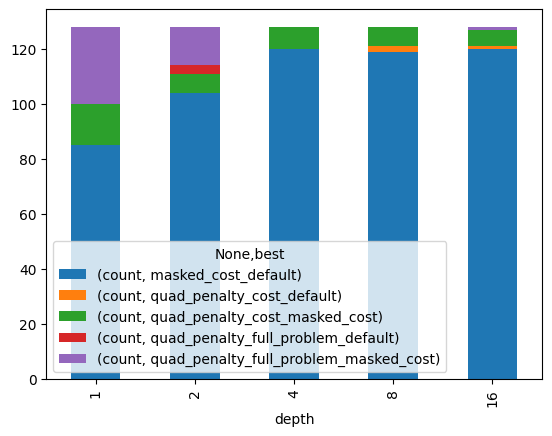

In [9]:
s = df2.groupby(["n_qubits", "depth"])["best"].value_counts()

dfs = pd.DataFrame(s).reset_index().set_index(["n_qubits", "depth"]).pivot_table(columns="best", index=["n_qubits", "depth"]).fillna(0)

dfs.groupby("depth").sum().plot(kind="bar", stacked=True)

# Findings
- Masked Cost performes better than the non-masked cost thing
- Full problem perfroms wors but surprisingly not that much more worse

In [ ]:
df.iterations